In [7]:
import pandas as pd

# Charger les données depuis des fichiers CSV (ajustez les chemins selon vos fichiers)
airports = pd.read_csv('csv/airports.csv')
flights = pd.read_csv('csv/flights.csv')  
airlines = pd.read_csv('csv/airlines.csv')
planes = pd.read_csv('csv/planes.csv')


# 1. Statistiques sur les aéroports
total_airports = airports.shape[0]
departure_airports = flights['origin'].nunique()
destination_airports = flights['dest'].nunique()

# Aéroports sans DST
airports_without_dst = airports[airports['dst'] == 'N'].shape[0]

# Nombre de fuseaux horaires (sans '/N')
time_zones = airports['tz'].nunique()

# Compte de compagnies, avions et vols annulés
total_companies = airlines.shape[0]
total_planes = planes.shape[0]  # Remplacez 'planes' par le DataFrame approprié
cancelled_flights = flights[flights['arr_delay'].isna()].shape[0]

results_1 = {
    "Total Aéroports": total_airports,
    "Aéroports de Départ": departure_airports,
    "Aéroports de Destination": destination_airports,
    "Aéroports sans DST": airports_without_dst,
    "Fuseaux Horaires": time_zones,
    "Total Compagnies": total_companies,
    "Total Avions": total_planes,
    "Vols Annulés": cancelled_flights
}

print(results_1)


{'Total Aéroports': 1458, 'Aéroports de Départ': 3, 'Aéroports de Destination': 103, 'Aéroports sans DST': 23, 'Fuseaux Horaires': 7, 'Total Compagnies': 16, 'Total Avions': 3322, 'Vols Annulés': 0}


In [8]:
# 2. Aéroport de départ le plus emprunté
most_popular_origin = flights['origin'].value_counts().idxmax()

# 10 destinations les plus prisées
top_10_destinations = (
    flights['dest']
    .value_counts()
    .head(10)
    .reset_index()
)
top_10_destinations.columns = ['Destination', 'Nombre de Vols']
top_10_destinations['Pourcentage'] = (top_10_destinations['Nombre de Vols'] / flights.shape[0]) * 100

# 10 destinations les moins prisées
bottom_10_destinations = (
    flights['dest']
    .value_counts()
    .tail(10)
    .reset_index()
)
bottom_10_destinations.columns = ['Destination', 'Nombre de Vols']
bottom_10_destinations['Pourcentage'] = (bottom_10_destinations['Nombre de Vols'] / flights.shape[0]) * 100

# 10 avions qui ont le plus décollé
top_10_planes = flights['tailnum'].value_counts().head(10)

results_2 = {
    "Aéroport le plus emprunté": most_popular_origin,
    "Top 10 Destinations": top_10_destinations,
    "Bottom 10 Destinations": bottom_10_destinations,
    "Top 10 Avions": top_10_planes
}

print(results_2)

{'Aéroport le plus emprunté': 'EWR', 'Top 10 Destinations':   Destination  Nombre de Vols  Pourcentage
0         ATL           12946     5.122990
1         ORD           12654     5.007440
2         LAX           11895     4.707088
3         BOS           11560     4.574522
4         MCO           10637     4.209273
5         CLT           10448     4.134481
6         SFO            9729     3.849959
7         FLL            9443     3.736783
8         MIA            8938     3.536944
9         DCA            7386     2.922787, 'Bottom 10 Destinations':   Destination  Nombre de Vols  Pourcentage
0         CHO              31     0.012267
1         JAC              25     0.009893
2         BZN              20     0.007914
3         PSP              19     0.007519
4         EYW              17     0.006727
5         TVC              16     0.006332
6         MTJ              15     0.005936
7         HDN              15     0.005936
8         SBN               4     0.001583
9         

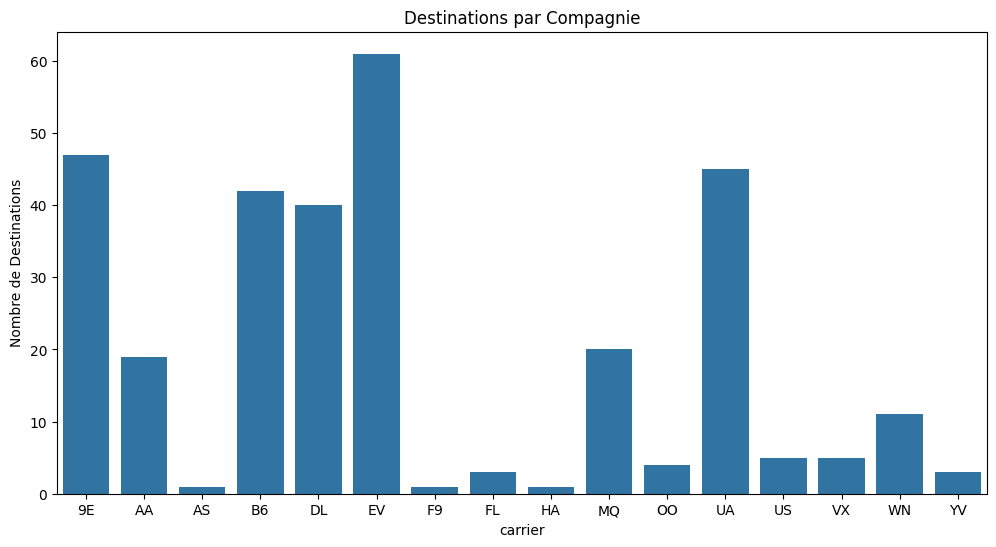

In [9]:
# 3. Destinations desservies par chaque compagnie
destinations_per_company = flights.groupby('carrier')['dest'].nunique().reset_index()

# Destinations desservies par compagnie et aéroport d'origine
destinations_per_company_by_origin = flights.groupby(['carrier', 'origin'])['dest'].nunique().reset_index()

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique du nombre de destinations par compagnie
plt.figure(figsize=(12, 6))
sns.barplot(data=destinations_per_company, x='carrier', y='dest')
plt.title('Destinations par Compagnie')
plt.ylabel('Nombre de Destinations')
plt.show()


In [10]:
# 4. Vols à Houston (IAH ou HOU)
flights_to_houston = flights[flights['dest'].isin(['IAH', 'HOU'])]

# Vols de NYC vers Seattle
flights_nyc_to_seattle = flights[(flights['origin'].isin(['JFK', 'LGA', 'EWR'])) & (flights['dest'] == 'SEA')]

# Nombre de compagnies et avions uniques
unique_companies_to_seattle = flights_nyc_to_seattle['carrier'].nunique()
unique_planes_to_seattle = flights_nyc_to_seattle['tailnum'].nunique()

results_4 = {
    "Vols à Houston": flights_to_houston.shape[0],
    "Vols de NYC à Seattle": flights_nyc_to_seattle.shape[0],
    "Compagnies uniques à Seattle": unique_companies_to_seattle,
    "Avions uniques à Seattle": unique_planes_to_seattle
}

print(results_4)


{'Vols à Houston': 6958, 'Vols de NYC à Seattle': 2736, 'Compagnies uniques à Seattle': 5, 'Avions uniques à Seattle': 857}


In [11]:
# 5. Nombre de vols par destination
flights_per_destination = flights['dest'].value_counts().reset_index()
flights_per_destination.columns = ['Destination', 'Nombre de Vols']

# Tri par destination, aéroport d'origine et compagnie
sorted_flights = flights.merge(airports[['faa', 'name']], left_on='origin', right_on='faa')
sorted_flights = sorted_flights.sort_values(by=['dest', 'origin', 'carrier'])

results_5 = {
    "Vols par Destination": flights_per_destination,
    "Vols Triés": sorted_flights[['origin', 'dest', 'carrier']]
}

print(results_5)


{'Vols par Destination':     Destination  Nombre de Vols
0           ATL           12946
1           ORD           12654
2           LAX           11895
3           BOS           11560
4           MCO           10637
..          ...             ...
98          TVC              16
99          MTJ              15
100         HDN              15
101         SBN               4
102         LEX               1

[103 rows x 2 columns], 'Vols Triés':        origin dest carrier
27881     JFK  ABQ      B6
28867     JFK  ABQ      B6
29830     JFK  ABQ      B6
30848     JFK  ABQ      B6
31579     JFK  ABQ      B6
...       ...  ...     ...
251184    LGA  XNA      MQ
251512    LGA  XNA      MQ
251960    LGA  XNA      MQ
252110    LGA  XNA      MQ
252449    LGA  XNA      MQ

[252704 rows x 3 columns]}


In [12]:
# 6. Compagnies n'opérant pas sur tous les aéroports d'origine
all_origins = airports['faa'].nunique()
operating_companies = flights.groupby('carrier')['origin'].nunique()
companies_not_all_origins = operating_companies[operating_companies < all_origins].index.tolist()

print("Compagnies n'opérant pas sur tous les aéroports d'origine:", companies_not_all_origins)


Compagnies n'opérant pas sur tous les aéroports d'origine: ['9E', 'AA', 'AS', 'B6', 'DL', 'EV', 'F9', 'FL', 'HA', 'MQ', 'OO', 'UA', 'US', 'VX', 'WN', 'YV']


In [13]:
# 7. Compagnies qui desservent l'ensemble des destinations
all_destinations = flights['dest'].nunique()
operating_companies_all_dest = flights.groupby('carrier')['dest'].nunique()
companies_all_dest = operating_companies_all_dest[operating_companies_all_dest == all_destinations].index.tolist()

print("Compagnies desservant l'ensemble des destinations:", companies_all_dest)

# Tableau avec toutes les origines et destinations
all_routes = flights[['origin', 'dest', 'carrier']].drop_duplicates()
print(all_routes)


Compagnies desservant l'ensemble des destinations: []
       origin dest carrier
0         EWR  IAH      UA
1         LGA  IAH      UA
2         JFK  MIA      AA
3         JFK  BQN      B6
4         LGA  ATL      DL
...       ...  ...     ...
235071    LGA  TVC      MQ
235657    LGA  BTV      9E
235826    LGA  MYR      EV
235891    EWR  DTW      OO
242117    LGA  TVC      EV

[431 rows x 3 columns]


In [14]:
# 8. Destinations exclusives à certaines compagnies
exclusive_destinations = flights.groupby('dest')['carrier'].nunique()
exclusive_destinations = exclusive_destinations[exclusive_destinations > 1].reset_index()
exclusive_destinations = exclusive_destinations[exclusive_destinations['carrier'] == 1]

print("Destinations exclusives à certaines compagnies:", exclusive_destinations)


Destinations exclusives à certaines compagnies: Empty DataFrame
Columns: [dest, carrier]
Index: []


In [15]:
# 9. Vols exploités par United, American ou Delta
specific_companies_flights = flights[flights['carrier'].isin(['UA', 'AA', 'DL'])]

print("Vols par United, American ou Delta:", specific_companies_flights)


Vols par United, American ou Delta:         year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0       2021      1    1       517             515          2       830   
1       2021      1    1       533             529          4       850   
2       2021      1    1       542             540          2       923   
4       2021      1    1       554             600         -6       812   
5       2021      1    1       554             558         -4       740   
...      ...    ...  ...       ...             ...        ...       ...   
252689  2021      7    3      1048            1055         -7      1330   
252692  2021      7    3      1052            1100         -8      1328   
252695  2021      7    3      1056            1055          1      1359   
252696  2021      7    3      1057            1059         -2      1249   
252698  2021      7    3      1059            1100         -1      1340   

        sched_arr_time  arr_delay carrier  flight tailnum origi